# 🎓 **Taller 4.2: Taller de Métodos de clustering basados en particiones**


## OBJETIVOS DEL TALLER:
En esta práctica estudiaremos el funcionamiento y la utilización métodos de clustering basados en particiones, como el K-means y el K-medoids.

# 🔧 **CONFIGURACIÓN INICIAL**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools as it

from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.rcParams['figure.figsize'] = [8, 8]

# 📁 **CARGAR LOS DATASETS Y GRAFICAR SUS DISTRIBUCIONES**

In [2]:
# Cargar dataset artificial
def cargar_dataset(nombre_dataset):
    try:
        # Intentar cargar desde URL alternativa
        data_file_url = "https://raw.githubusercontent.com/SandraNavarrete-docente/aprendizaje-automatico-252601/main/04-MODELOS-NO-SUPERVISADOS/data/"+nombre_dataset
        D = np.array(pd.read_excel(data_file_url,header=0))
        print("✅ Dataset cargado desde URL GitHub")
        return D
    except:
        print("❌ No se pudo cargar el dataset")
        return None

✅ Dataset cargado desde URL GitHub


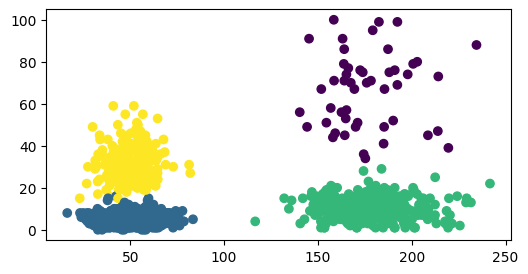

In [3]:
# Cargar dataset
D =cargar_dataset("dataset_cuatro_diferente_densidad.xlsx")
Dx = D[:,0:2]
Dy = D[:,2]
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(Dx[:,0],Dx[:,1], c=Dy)

# 🎯 **EJ 1:Cree el algoritmo K-means que tiene un único parámetro: el número de clústeres (K).**

In [4]:
# PASO 1 elejir los centros iniciales de forma randomica
def random_sample_float(n, mi, ma):
    return (ma - mi) * np.random.random_sample(n) + mi

def paso1_elije_centros(K, Dx):
  cDx = np.zeros(K*Dx.shape[1])
  cDx.shape = (K,Dx.shape[1])
  # 1.1 Completa el codigo aqui
  x1 = random_sample_float(K, np.min(Dx[:,0]), np.max(Dx[:,0]))
  x2 = random_sample_float(K, np.min(Dx[:,1]), np.max(Dx[:,1]))
  cDx[:,0] = x1
  cDx[:,1] = x2
  return cDx


Los centros iniciales elegidos aleatoriamente son:
[[ 73.98205603   4.19296481]
 [ 30.60095953  29.70571285]
 [ 47.38554091  46.97577561]
 [226.90442911  38.51304576]]


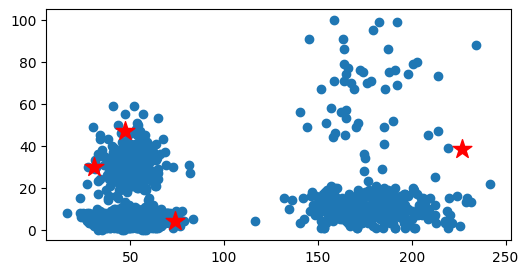

In [5]:
print('Los centros iniciales elegidos aleatoriamente son:')
K=4
cDx = paso1_elije_centros(K, Dx)
print(cDx)
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(Dx[:,0],Dx[:,1])
ax.scatter(cDx[:,0],cDx[:,1], marker='*', s=200, c='r')

2.   Paso de asignación de datos
En este paso, cada elemento de nuestro dataset se asigna al centroide más cercano basado en la distancia escogida: en nuestro caso, la Euclidiana. Por tanto, tendremos que implementar la siguiente operación:

$$
\DeclareMathOperator*{\argminA}{arg\,min}
\argminA_{c_i \in C} dist\left ( c_i, x \right )^2
$$

In [6]:
# Definimos la distancia euclidiana de una instancia x con respecto a un grupo de instancias C
def distancia_euclidiana_grupo(x, C):
  return np.linalg.norm(C - x, axis=1);

def paso2_asigna_puntos(Dx, cDx):
  Dyp = np.zeros(Dx.shape[0])
  # Buscamos el centro más cercano a cada instancia y la asignamos a ese clúster
  for i in np.arange(Dx.shape[0]):
      # Tenemos que calcular la distancia de cada muestra del dataset Dx[i]
      # a cada centro existente en cDx. Podemos utilizar para ello la función
      # distancia_euclidiana_grupo.
      # 1.2 Completa el codigo aqui
      distancia_punto_a_centros = distancia_euclidiana_grupo(Dx[i,:], cDx)

      # Una vez calculada la distancia, necesitamos averiguar el índice de
      # la distancia mínima. Para ello, podemos usar la función argmin de numpy.
      pred_y = np.argmin(distancia_punto_a_centros)
      Dyp[i] = pred_y
  return Dyp

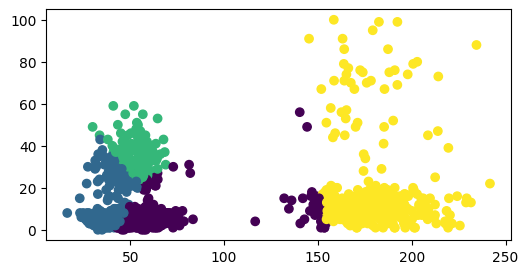

In [7]:
Dyp = paso2_asigna_puntos(Dx, cDx)
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(Dx[:,0],Dx[:,1], c=Dyp)

3.   Paso de actualización del centroide
En este paso se recalcula el centroide de cada cluster, teniendo en cuenta la nueva asignación calculada en el paso 1. Para ello, se calcula la media de todos los puntos asignados en el paso anterior.

$$
c_i = \frac{1}{\left | S_i \right |} \sum_{x_i \in S_i} x_i
$$


In [8]:
def paso3_actualiza_centros(Dx, cDx, Dyp, K):
  cDx_ant = cDx.copy()
  for k in range(K):
      # Seleccionamos los puntos asignados al cluster k
      puntos_cluster_k = Dx[Dyp == k]
      # Calculamos la media de las coordenadas x e y
      if len(puntos_cluster_k) > 0:  # Evitar división por cero si el cluster está vacío

          # 1.3 Completa el codigo aqui
          cDx[k,:] = np.mean(puntos_cluster_k, axis=0)

      else:
          # Si el cluster está vacío, mantenemos el centroide anterior
          cDx[k,:] = cDx_ant[k,:]
  return cDx

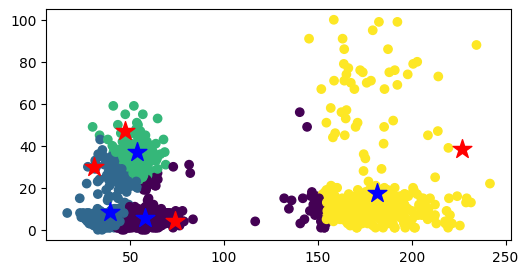

In [9]:
cDx_ant = cDx.copy()
cDx =paso3_actualiza_centros(Dx, cDx, Dyp, K)
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(Dx[:,0],Dx[:,1], c=Dyp)
ax.scatter(cDx[:,0],cDx[:,1], marker='*', s=200, c='b')
ax.scatter(cDx_ant[:,0],cDx_ant[:,1], marker='*', s=200, c='r')

Y esto es todo. Este proceso se repite hasta cumplir un criterio de detención:

*   No hay cambios en los puntos asignados a cada cluster
*   La suma de las distancias alcanza un valor mínimo establecido
*   Se alcanza un número máximo de iteraciones

In [10]:
def MyKMeans(Dx, K):
  # 1.4 Completa el codigo aqui
  cDx = paso1_elije_centros(K, Dx)
  cDxIni = cDx.copy()
  # Flag de convergencia
  iterando = True
  while iterando:
    # Vector auxiliar para guardar los centros de la iteración pasada
    # necesarios para identificar la convergencia
    cDx_ant = cDx.copy()

    Dyp = paso2_asigna_puntos(Dx, cDx)

    # Calcular los nuevos centros
    cDx = paso3_actualiza_centros(Dx, cDx, Dyp, K)

    iterando = (np.absolute(np.sum(cDx-cDx_ant)) > 0.00001)
  return cDx, Dyp, cDxIni

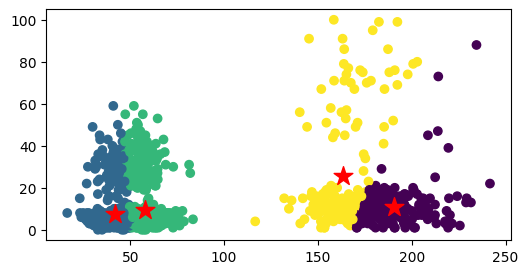

In [33]:
cDx, Dyp,cDxIni = MyKMeans(Dx, 4)
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(Dx[:,0],Dx[:,1], c=Dyp)
ax.scatter(cDx[:,0],cDx[:,1], marker='*', s=200, c='r')

# 🎯 **EJ 2: COMPARE SUS RESULTADOS CON SCIKIT-LEARN**

Centros encontrados por...
el método programado:
[[ 58.04101291   5.5898709 ]
 [ 39.38778431   8.56666667]
 [ 53.53622807  37.06140351]
 [181.32391304  17.67391304]]
el método de Sci-kit Learn:
[[ 58.61664073   7.3307393 ]
 [179.48675287  10.6091954 ]
 [ 42.72083933   9.87769784]
 [175.6826087   68.36956522]]


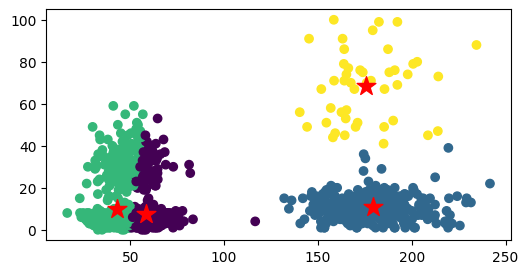

In [12]:
from sklearn.cluster import KMeans

# Se inicializa KMeans con el número de clústeres a buscar
# 2.1 Completa el codigo aqui
modelo = KMeans(n_clusters=4)

# Se entrena el modelo
# 2.2 Completa el codigo aqui
modelo.fit(Dx)

# Se predice los clusters
# 2.3 Completa el codigo aqui
Dyp_sk = modelo.predict(Dx)

# Obtener los centros de los clústeres
cDx_sk = modelo.cluster_centers_

# Comparing with scikit-learn centroids
print('Centros encontrados por...')
print('el método programado:')
print(cDx)
print('el método de Sci-kit Learn:')
print(cDx_sk)

# Ver asignaciones finales
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(Dx[:,0],Dx[:,1], c=Dyp_sk)
ax.scatter(cDx_sk[:,0],cDx_sk[:,1], marker='*', s=200, c='r')


### 📈 **RESULTADOS:**
**Conteste las siguientes preguntas**

¿Porque difieren los grupos de sklearn con el algoritmo que tu implementaste?

La diferencia radica en que el algoritmo implementado elije centroides de manera aleatoria a diferencia de Kmeans que elije centroides inicialmente mas separados y mas inteligente, esto amenudo conduce a una convergencia mas consistente.


# 🎯 **EJ 3: USA LAS METRICAS INTRINSECAS Y EXTRINSECAS PARA DECIDIR QUE TAN BIEN AGRUPADOS ESTAN LOS DATOS**

In [13]:
from sklearn.metrics import silhouette_score

# 3.1 Completa
silhouette_avg = silhouette_score(Dx, Dyp)

print(silhouette_avg)


0.4399730935656702


In [14]:
from sklearn.metrics import calinski_harabasz_score

# 3.2 Completa
calinski_harabasz_score_avg = calinski_harabasz_score(Dx, Dyp)


print(calinski_harabasz_score_avg)


5822.96320998564


In [17]:
def medida_R_cuadrado(X, Xyp, cXs):
    centros_dataset = np.mean(X,axis=0)
    n_clusters = np.sort(np.unique(Xyp))
    distancia_a_centros_dataset = np.sum((X-centros_dataset)**2)
    distancias_intracluster = np.zeros(n_clusters.size)
    for k in np.arange(n_clusters.size):
        # Cast n_clusters[k] to int for indexing cXs
        distancias_intracluster[k] = np.sum((X[Xyp==n_clusters[k], :] - cXs[int(n_clusters[k]), :])**2)
    distancia_intracluster = np.sum(distancias_intracluster)
    # 3.3
    return 1 - (distancia_intracluster / distancia_a_centros_dataset)
    ## Tu código aquí ##

In [20]:
# 3.4 usa R cuadrado
rCuadrado = medida_R_cuadrado(Dx, Dyp, cDx)
print(rCuadrado)

0.8975025014049869


In [21]:
def calcular_inercia(X, labels, centros):
    inercia = 0
    for i, centro in enumerate(centros):
        puntos_cluster = X[labels == i]
        if len(puntos_cluster) > 0:
            distancias = np.sum((puntos_cluster - centro) ** 2, axis=1)
            inercia += np.sum(distancias)
    return inercia

In [22]:
#3.8 usa la inercia
inercia = calcular_inercia(Dx, Dyp, cDx)
print(inercia)

602257.967163601


In [23]:
#Resumen de las metricas calculadas
print('Silhouette score:', silhouette_avg)
print('Calinski-Harabasz score:', calinski_harabasz_score_avg)
print('R cuadrado:', rCuadrado)
print('Inercia:', inercia)

Silhouette score: 0.4399730935656702
Calinski-Harabasz score: 5822.96320998564
R cuadrado: 0.8975025014049869
Inercia: 602257.967163601


### 📈 **RESULTADOS:**
**Interpreta con las medidas intrinsecas que tan bien agrupado estan los clusters**


* **Analizando el Silhouette score** vemos que tenemos un valor de 0,44, esto quiere decir que los clústes estan bastante bien definidos pero existen ciertos puntos que se hacercan un poco a clusters equivocados.

* **Analizando la metrica Calinski-Harabasz score** podemos observar que tenenmos un valor de 5822.96, esto nos dice que los cluster tienen una buena estructura interna de agrupamiento, apesar de que exiten ciertos puntos que se hacercan mas a cluster erroneos como pudimos observar en la metrica anterior.

* **Analizando la metrica de R Cuadrado** obtuvimos un valor de 0,8975 casi el 90% esto es excelente ya que indica que los clusters explican la mayor parte de la variacion presente en los datos.

* **Analizando la metrica de la Inercia**, se observa un valor de 602257,9671 lo cual nos indica que exite una buena cohesión interna de los datos.

# 🚀 ¡TALLER FINALIZADO!"